# IE0005 Lecture 2

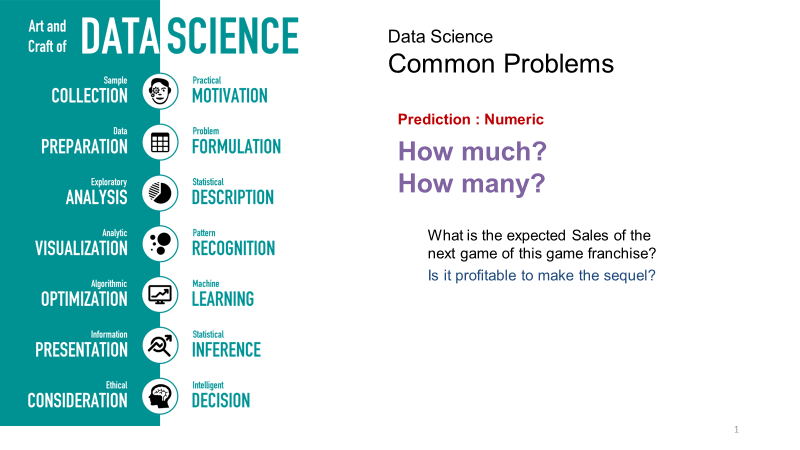

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Data Acquisition

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head(n=10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


## Numeric Data

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

### Uni-Variate Statistics

In [4]:
hp = pd.DataFrame(pkmndata['HP'])
hp.head()

,HP
0,45
1,60
2,80
3,80
4,39


In [5]:
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


Data: $hp = [hp_1, hp_2, \ldots, hp_n]$

Mean $\overline{hp}=\frac{1}{n} \sum_{i=1}^n hp_i$

Standard deviation $\mathrm{s.d.}(hp) = \left(\frac{1}{n} \sum_{i=1}^n (hp_i - \overline{hp})^2\right)^{1/2}$

Median or 50% quantile: the value at which $\geq 50\%$ of hp values are below and above.

Sort $hp$:   $hp_{(1)}$, $hp_{(2)}$, ..., $hp_{(n)}$

If $n$ is odd: $hp_{(\frac{n+1}{2})}$

If $n$ is even: $\frac{hp_{(n/2)} + hp_{(n/2+1)}}{2}$ (by convention)

$q$% quantile: smallest value $x$ such that $\mathbb{P}(hp \leq x) = \frac{1}{n} \sum_{i=1}^n 1(hp_i \leq x) \geq q\%$.

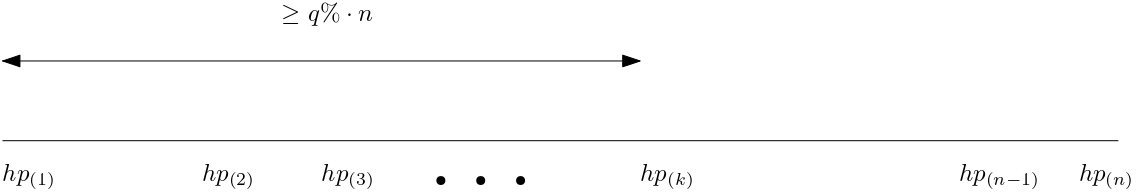

<AxesSubplot: >

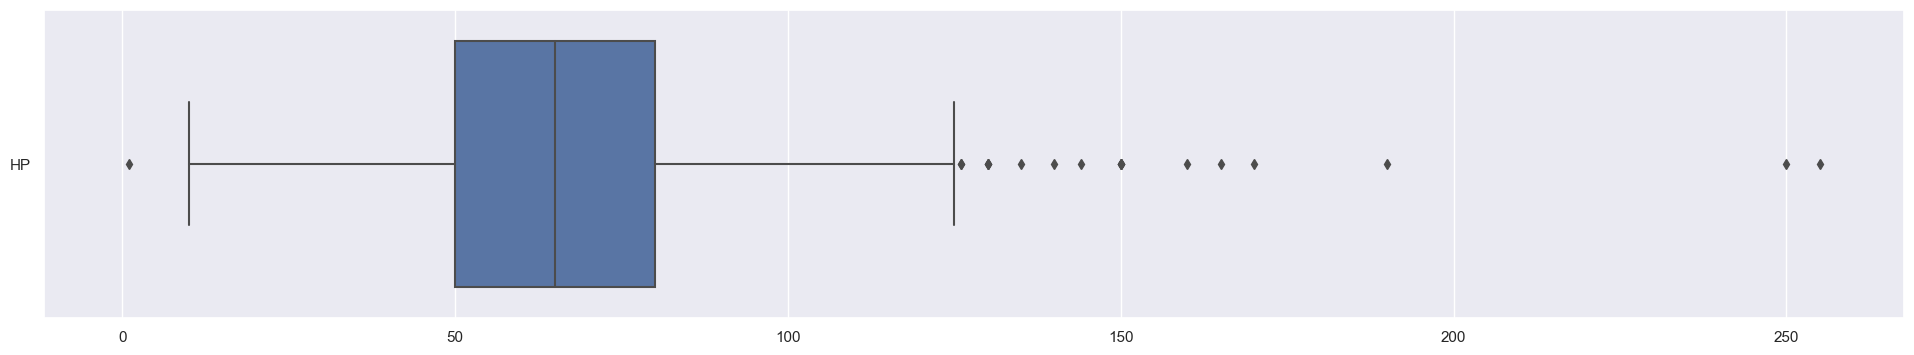

In [6]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = hp, orient = "h")

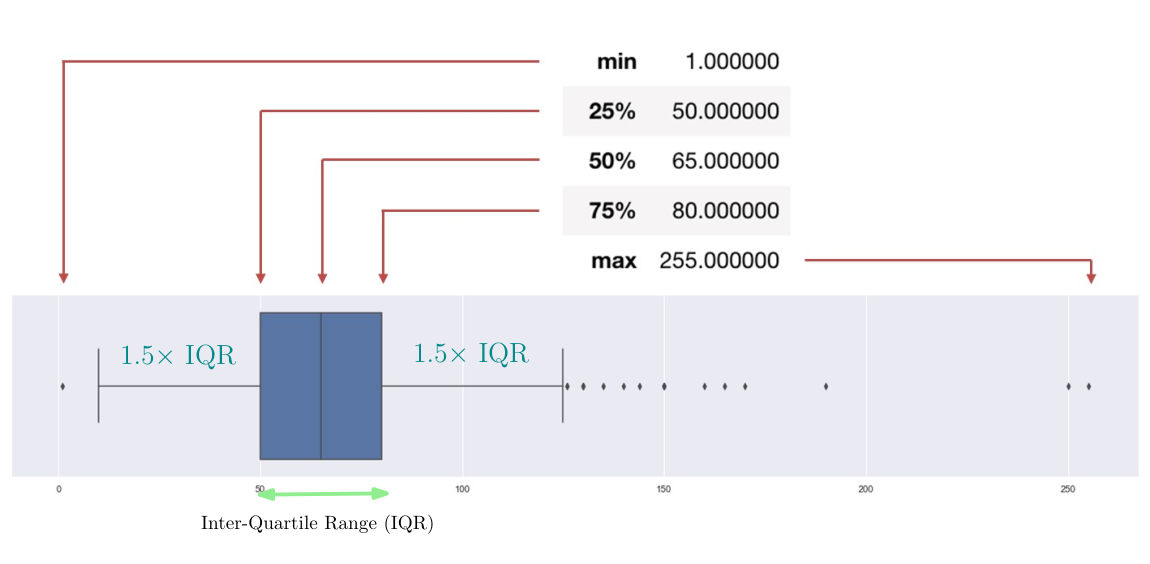

<AxesSubplot: ylabel='Count'>

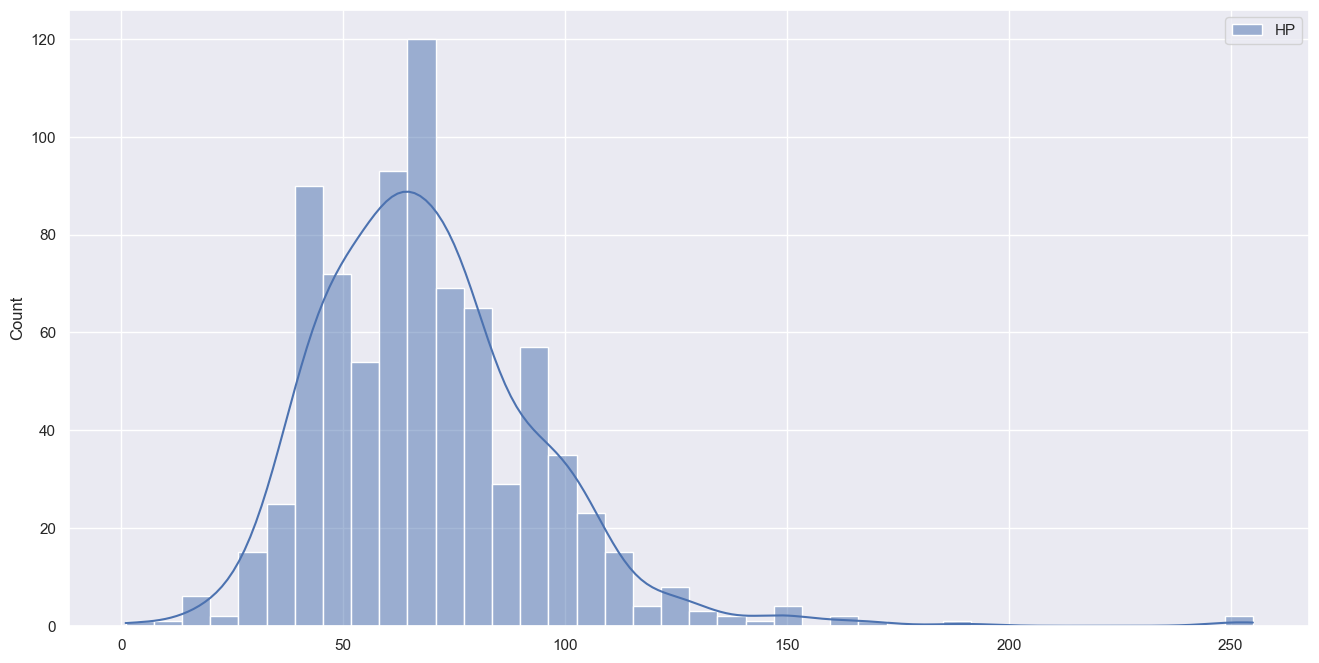

In [7]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = hp, kde=True)

<AxesSubplot: >

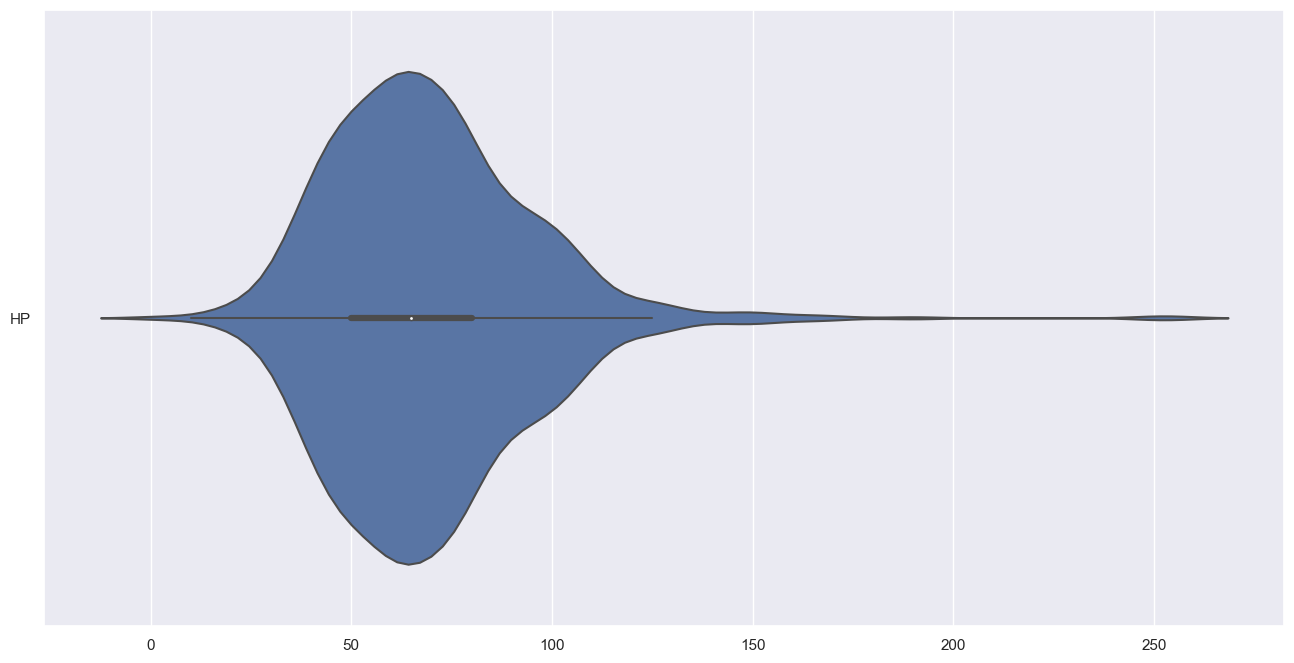

In [8]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = hp, orient = "h")

Normal Distribution

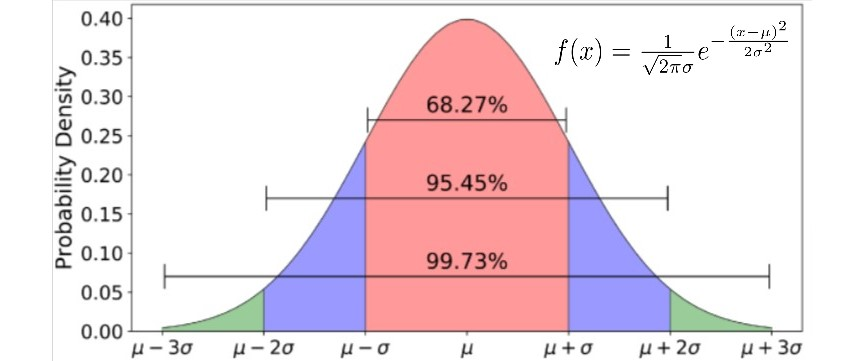

### Bi-Variate Statistics

In [9]:
hp = pd.DataFrame(pkmndata['HP'])
total = pd.DataFrame(pkmndata['Total'])

<AxesSubplot: >

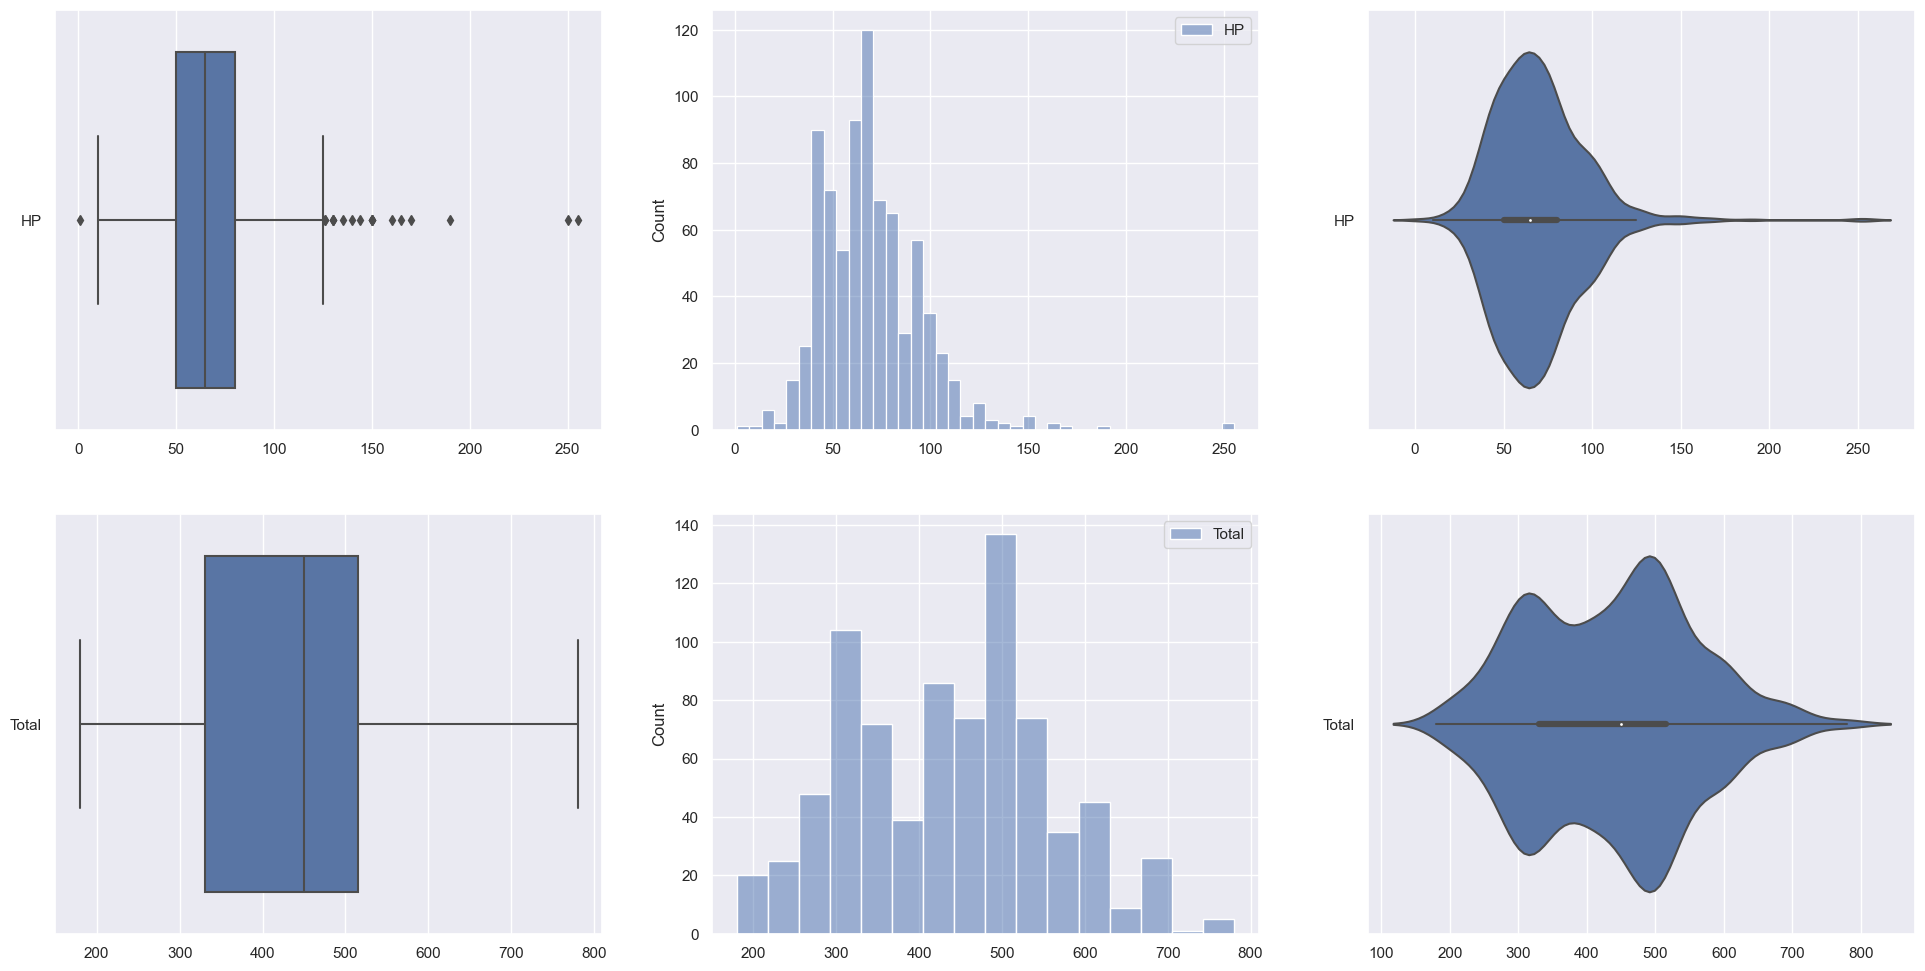

In [10]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = hp, orient = "h", ax = axes[0,0])
sb.histplot(data = hp, ax = axes[0,1])
sb.violinplot(data = hp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = total, orient = "h", ax = axes[1,0])
sb.histplot(data = total, ax = axes[1,1])
sb.violinplot(data = total, orient = "h", ax = axes[1,2])

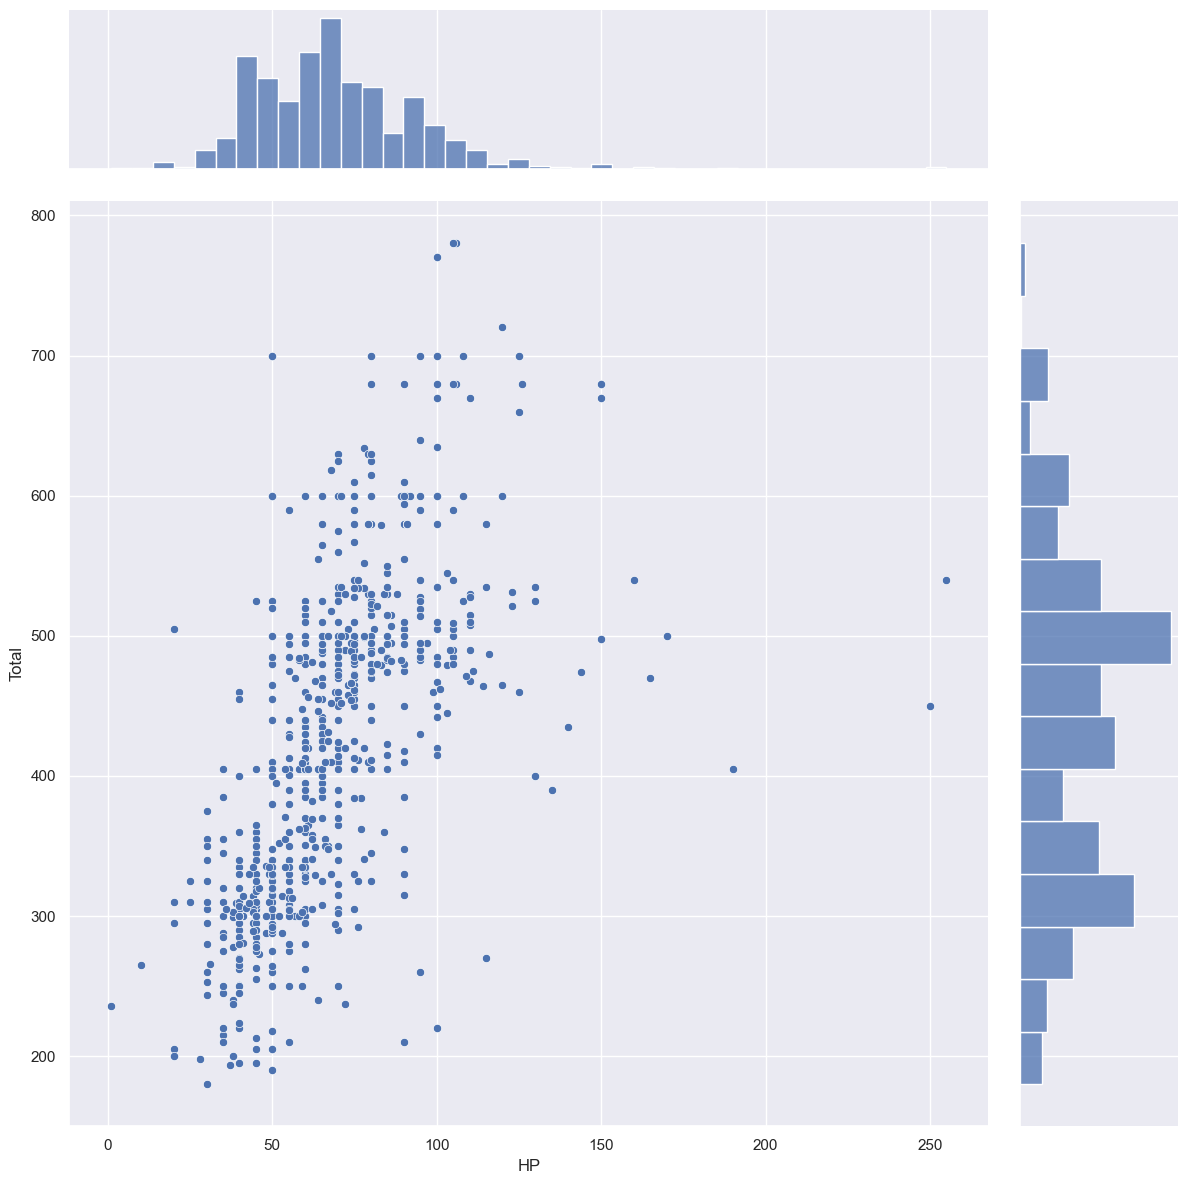

In [11]:
jointDF = pd.concat([total, hp], axis = 1)
sb.jointplot(data = jointDF, x = "HP", y = "Total", height = 12)

<AxesSubplot: >

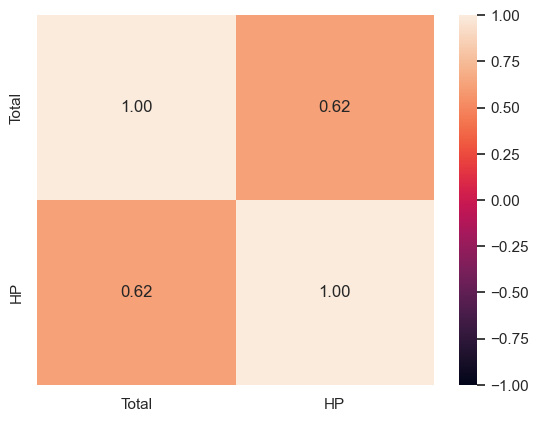

In [12]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

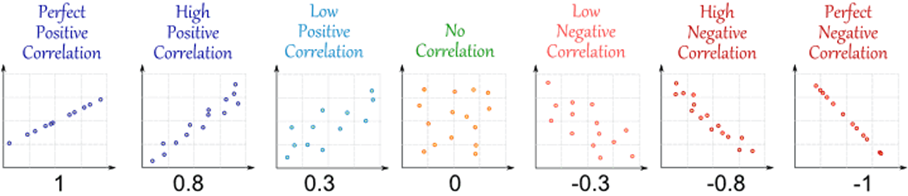

## Linear Regression

In [13]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
total = pd.DataFrame(pkmndata['Total'])   # Response
hp = pd.DataFrame(pkmndata['HP'])         # Predictor

# Split the Dataset into Train and Test
hp_train, hp_test, total_train, total_test = train_test_split(hp, total, test_size = 0.25)

Hypothesis: $total = a \cdot hp + b + error$

Use training data $\{ (hp_i, total_i) : i=1,\ldots,n \}$ to learn $a$ and $b$.

\begin{equation*}
 \min_{a,b} MSE = \frac{1}{n} \sum_{i=1}^n (total_i - (a\cdot hp_i + b))^2
\end{equation*}

In [14]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hp, total, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()



Intercept of Regression 	: b =  [250.41081864]
Coefficients of Regression 	: a =  [[2.62391883]]



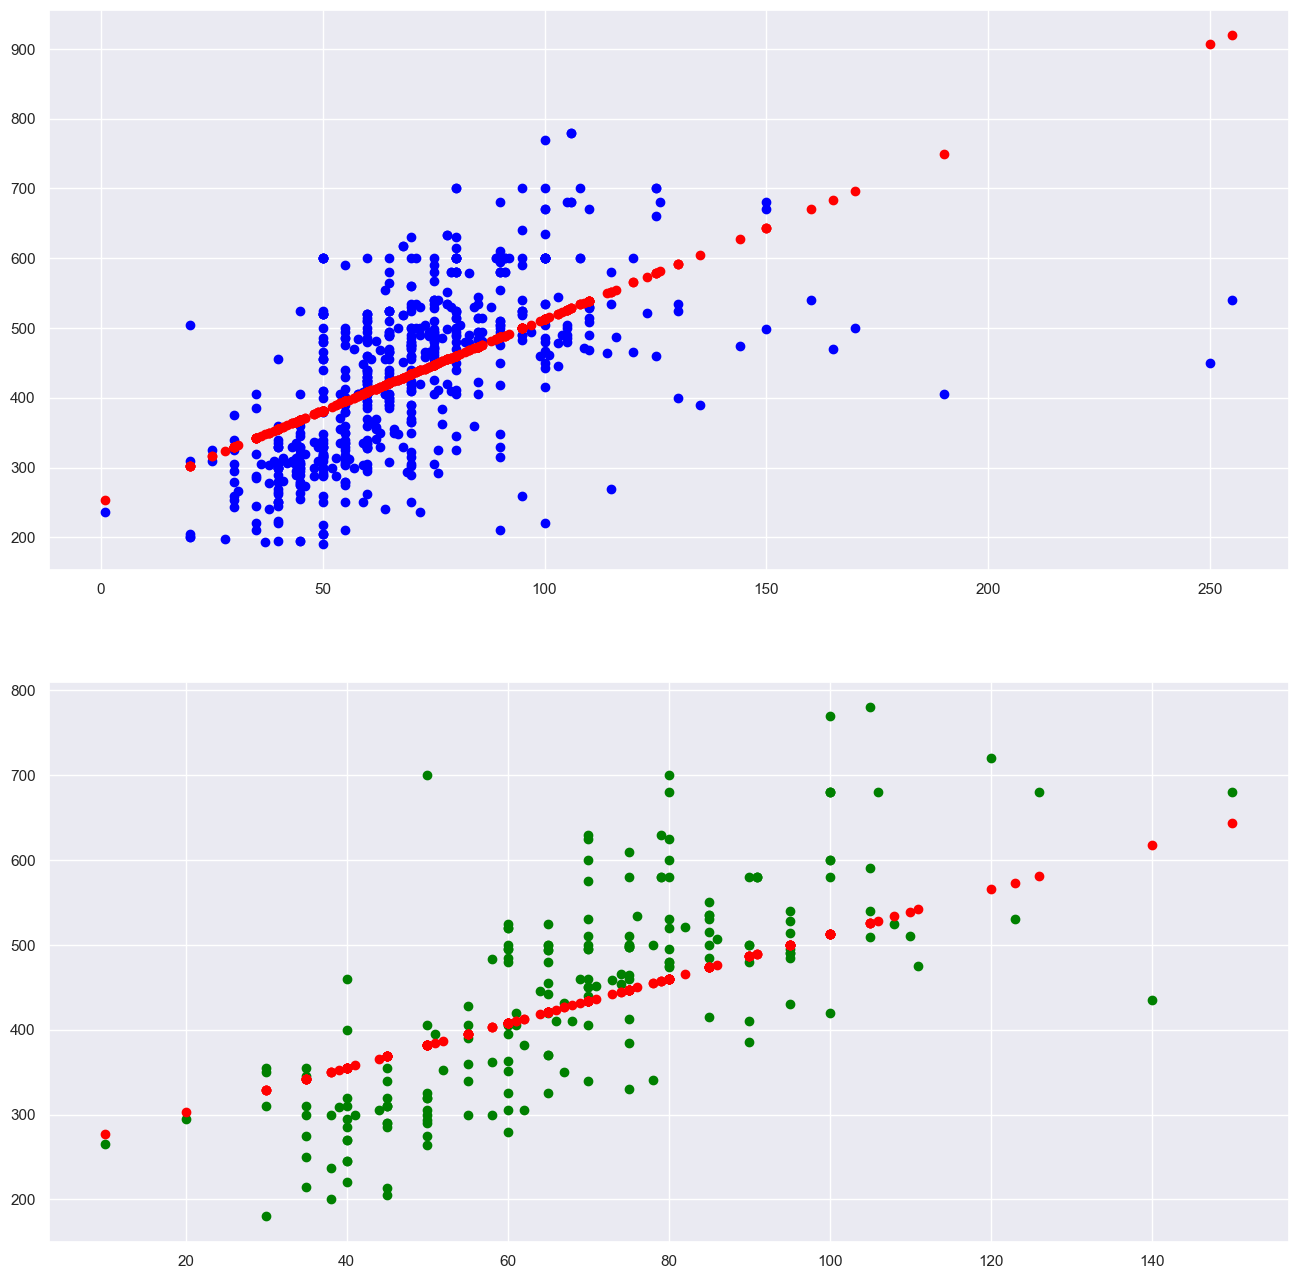

In [15]:
# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Linear Regression line
f, axes = plt.subplots(2, 1, figsize=(16, 16))

axes[0].scatter(X_train, y_train, color = "blue")
axes[0].scatter(X_train, y_train_pred, color = "red")

axes[1].scatter(X_test, y_test, color = "green")
axes[1].scatter(X_test, y_test_pred, color = "red")




$\overline{total} = \frac{1}{n} \sum_{i=1}^n total_i$

Goodness of fit:
$$
\begin{aligned}
MSE &= \frac{1}{n}\sum_{i=1}^n (total_i - (a\cdot hp_i + b))^2 \\
R^2 &= 1 - \frac{\sum_{i=1}^n (total_i - (a\cdot hp_i + b))^2}{\sum_{i=1}^n (total_i - \overline{total})^2 } = 1 - \frac{RSS}{TSS}
= 1 - \frac{RSS/n}{TSS/n} 
= 1 - \frac{MSE}{\widehat{var}(total)}
\end{aligned}
$$

In [16]:
# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3410729685815065
Mean Squared Error (MSE) 	: 9261.195265929107

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.47989779305872216
Mean Squared Error (MSE) 	: 7941.682913404586



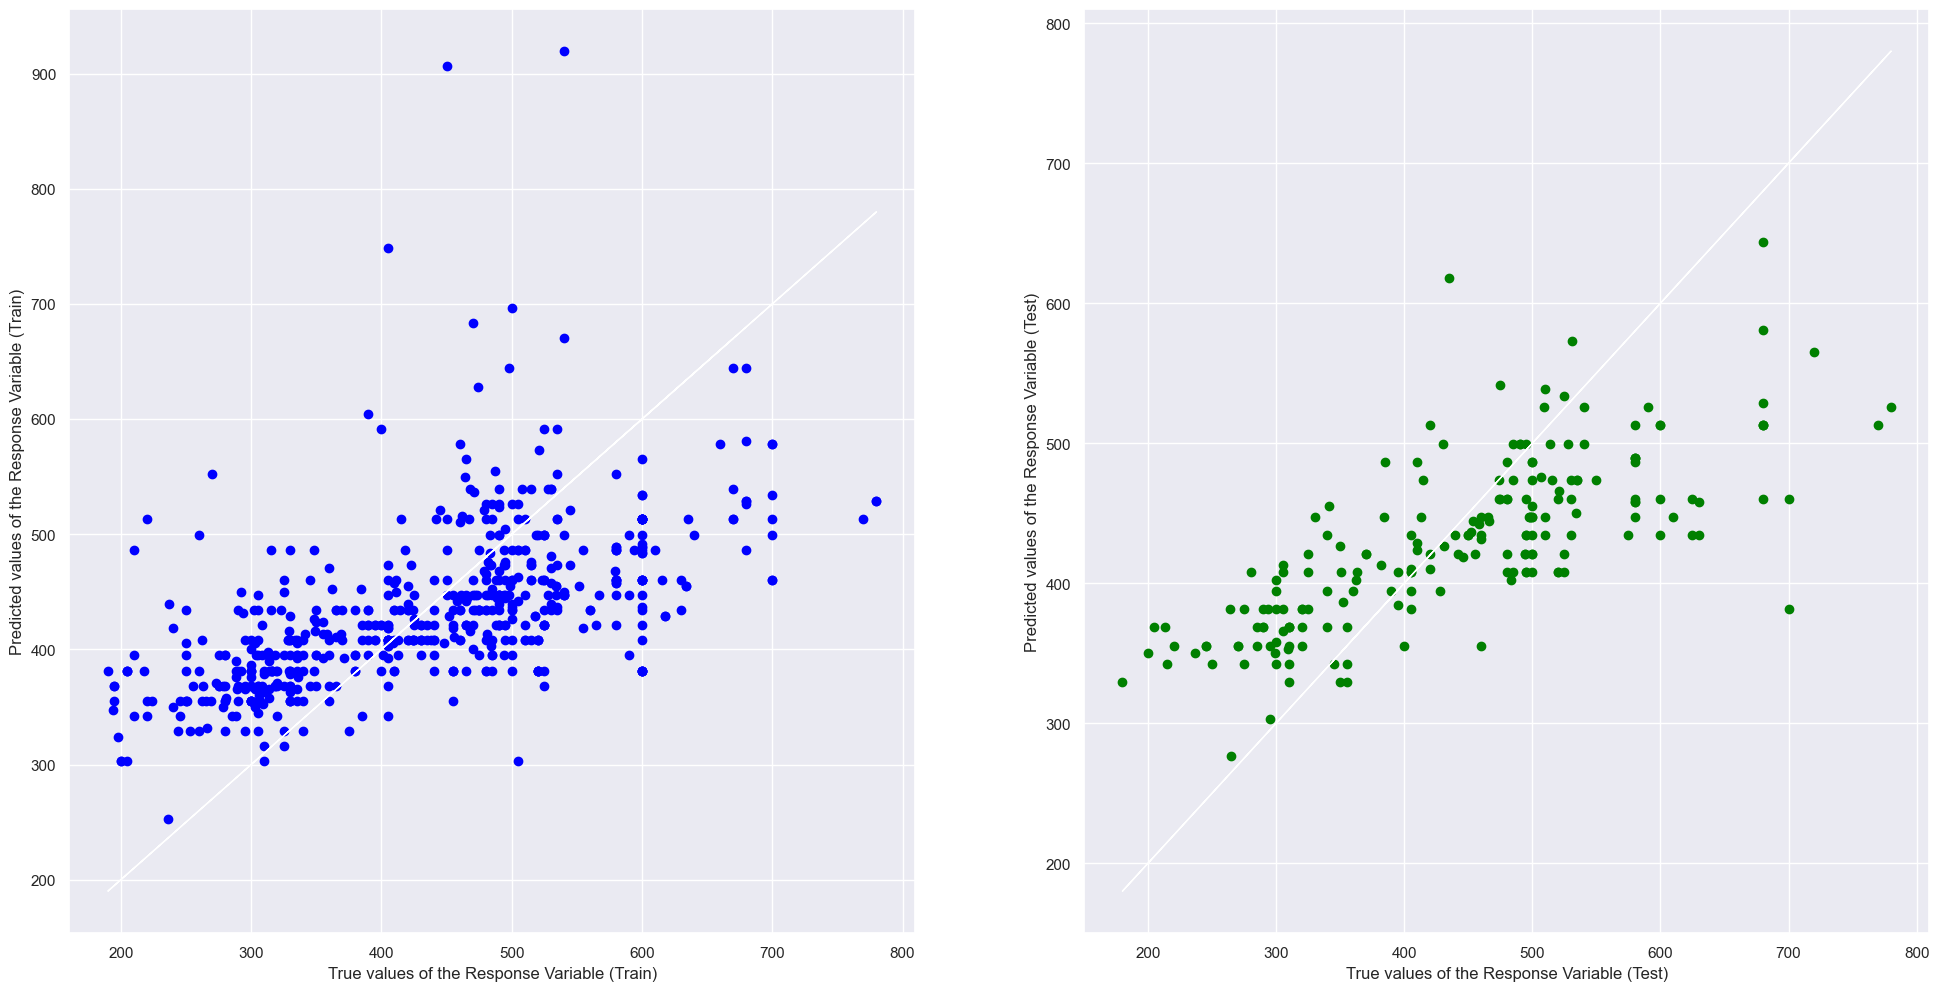

In [17]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Multi-Variate Statistics

In [18]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<AxesSubplot: >

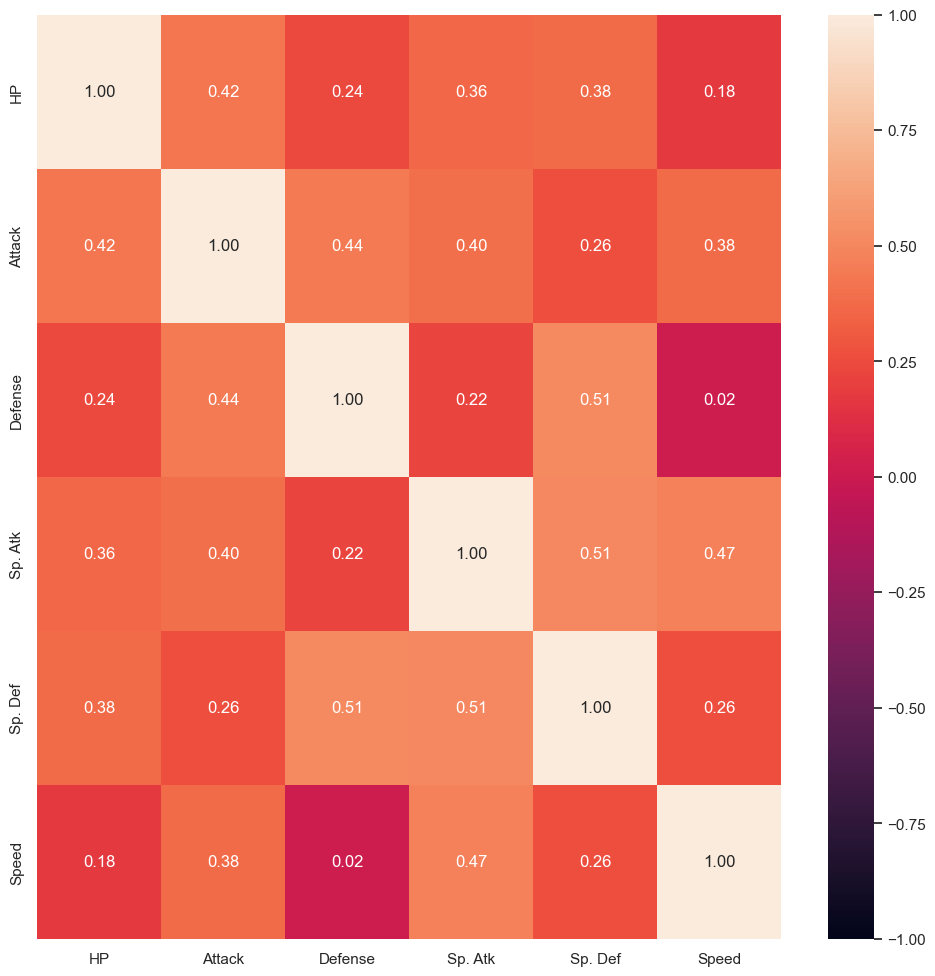

In [19]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

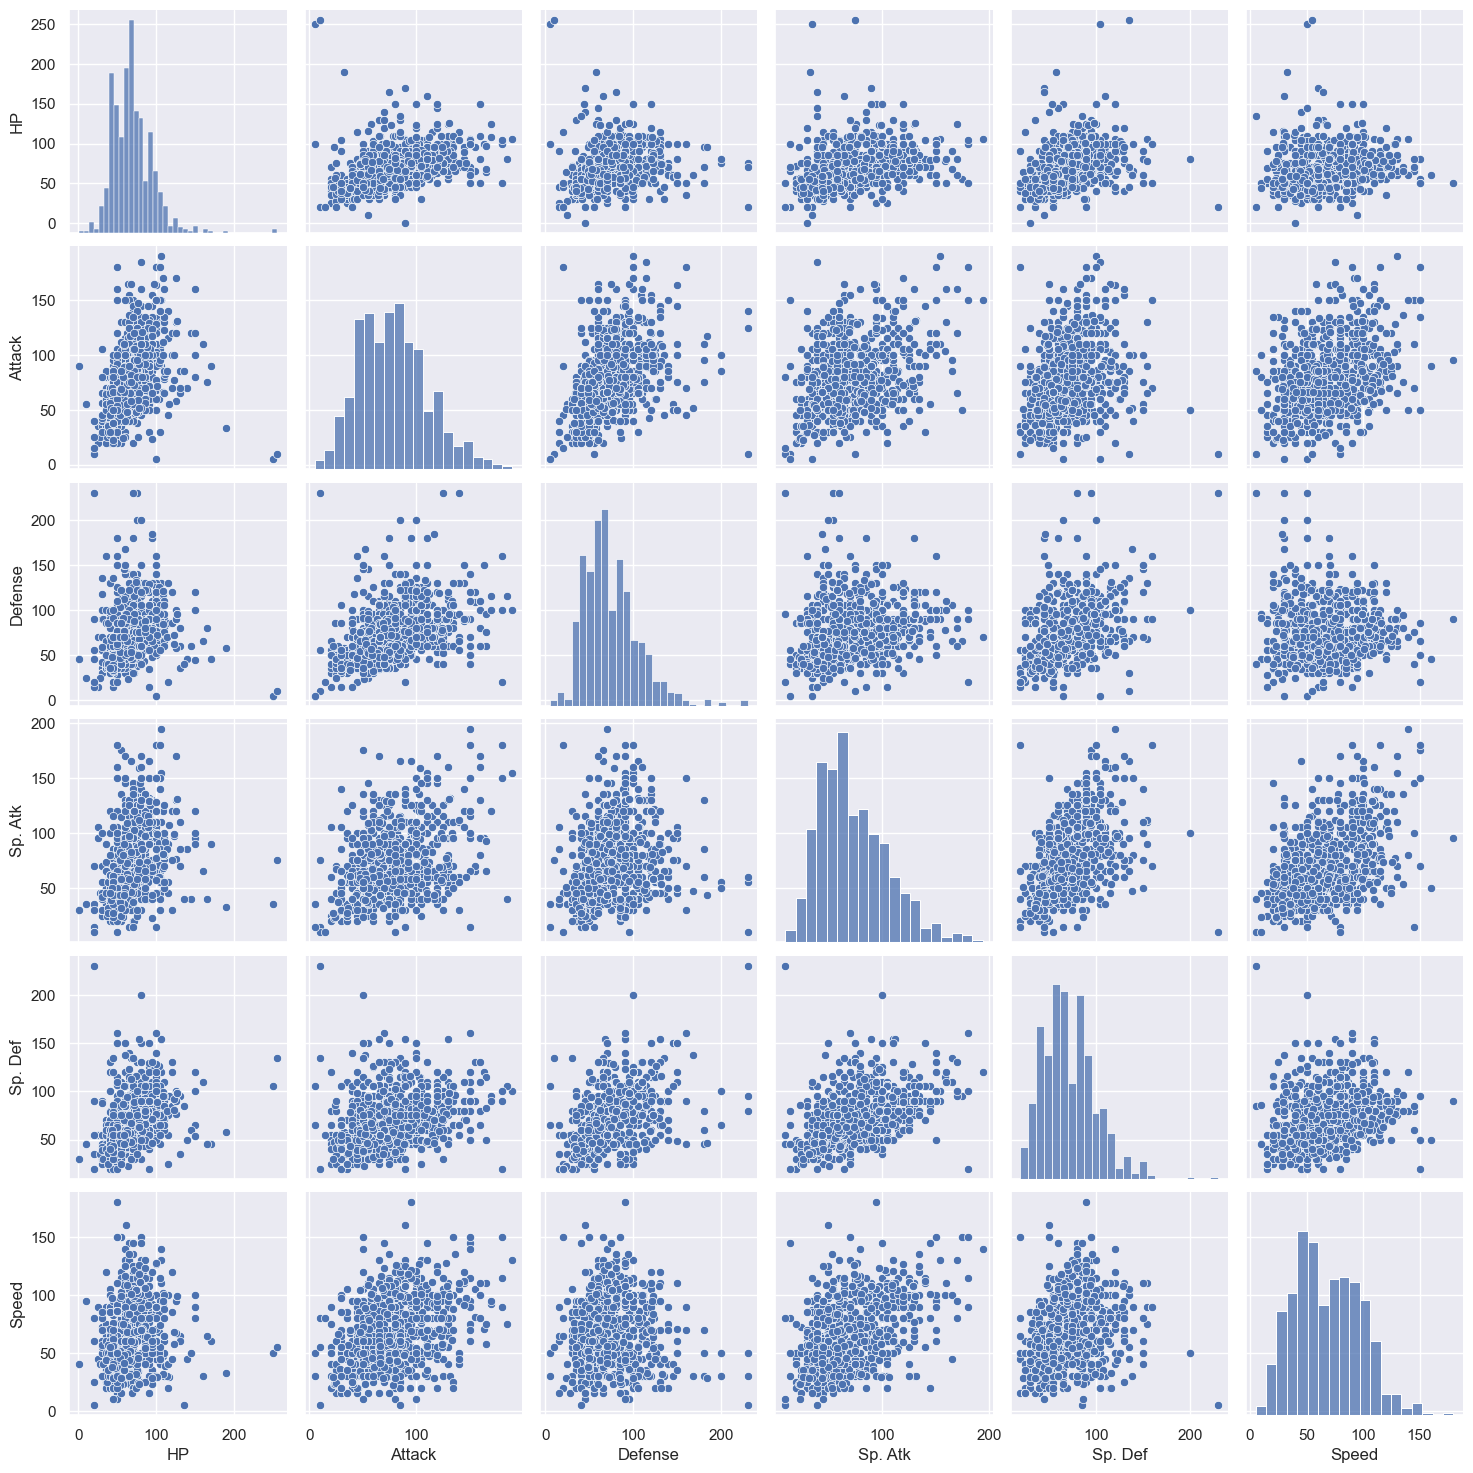

In [20]:
sb.pairplot(data = numDF)

## Multi-Variate Linear Regression

Response Variable : **Total**     
Predictor Feature : **HP, Attack**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $b$  


In [21]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack"]])

In [22]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()


Intercept of Regression 	: b =  [151.47187875]
Coefficients of Regression 	: a =  [[1.71398426 2.11142403]]

  Predictors  Coefficients
0         HP      1.713984
1     Attack      2.111424



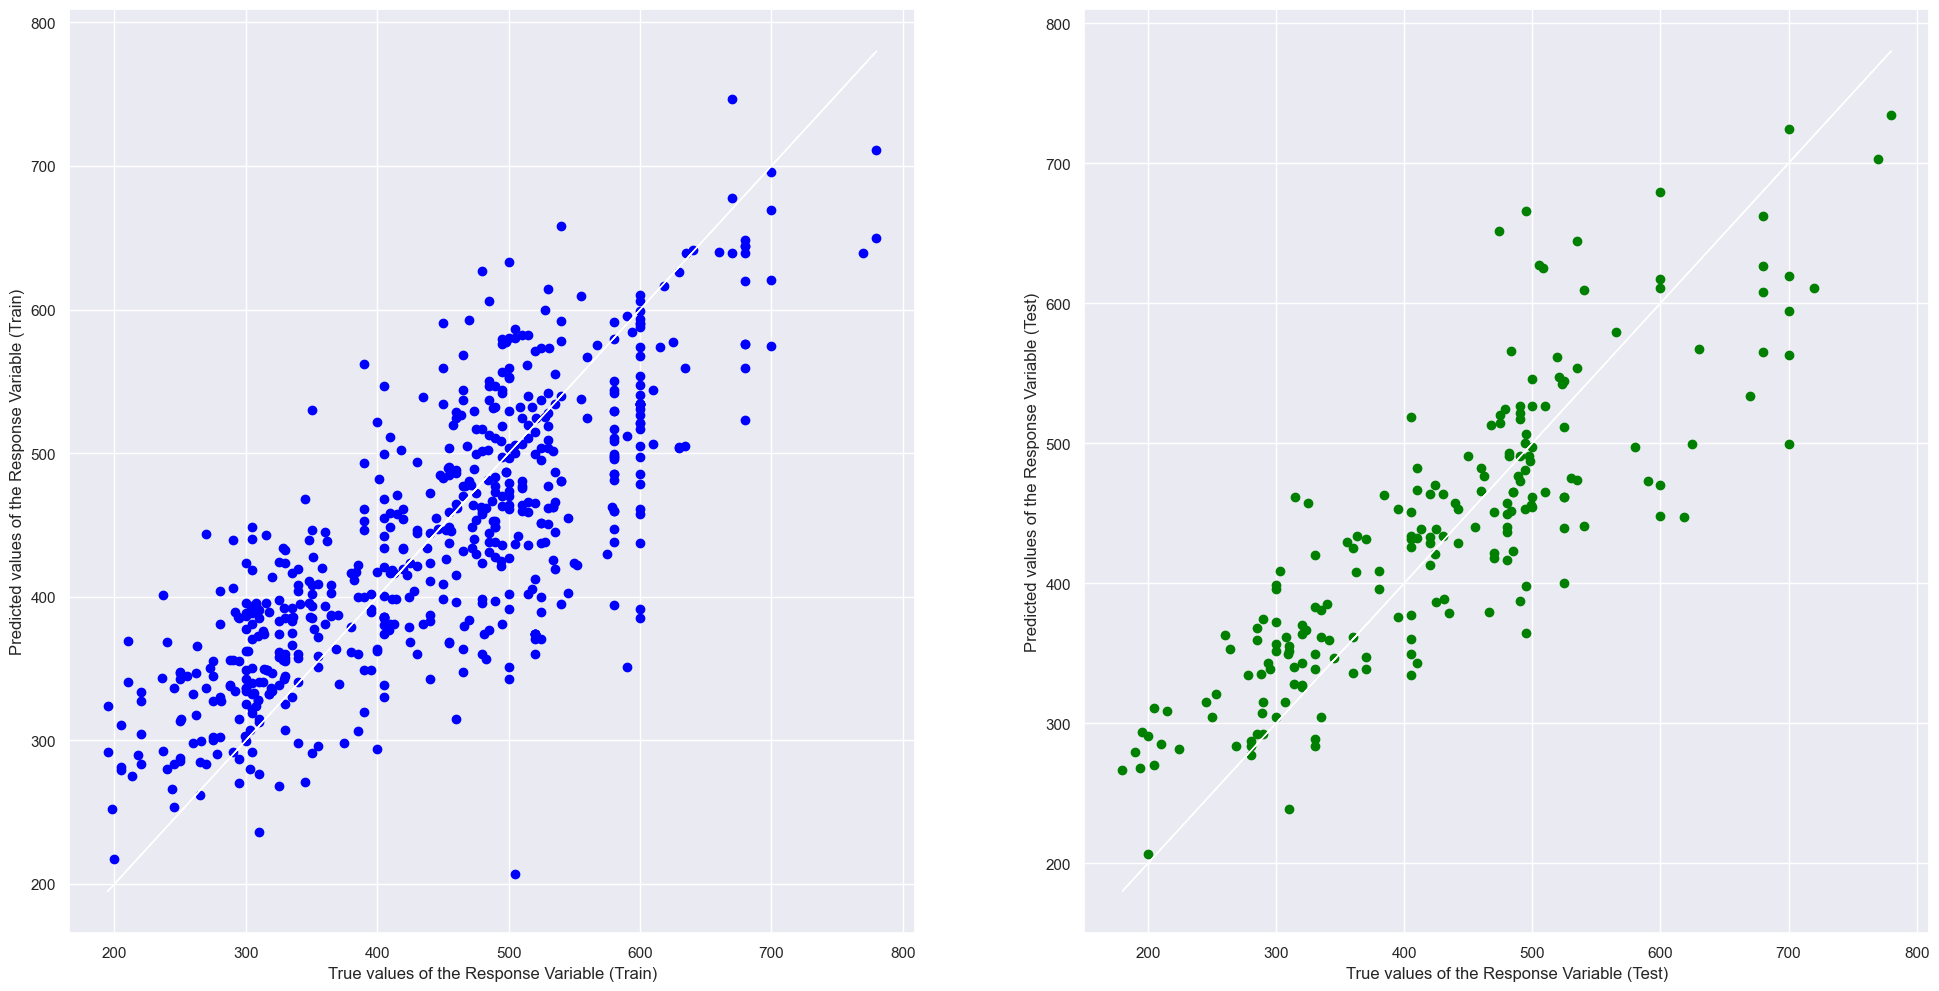

In [23]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [24]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6274636715487989
Mean Squared Error (MSE) 	: 5155.517765329876

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7313926853865049
Mean Squared Error (MSE) 	: 4261.180395363906



#### Adding predictors sequentially

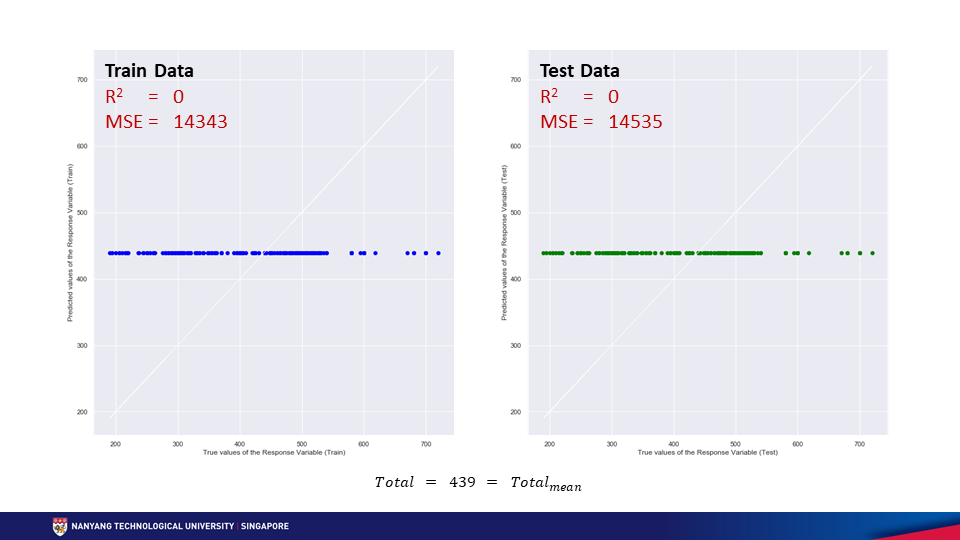

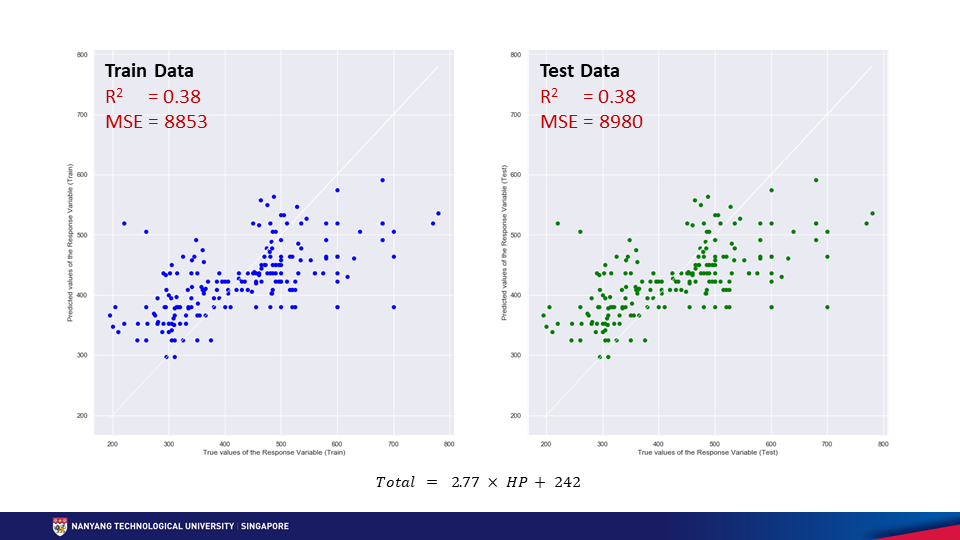

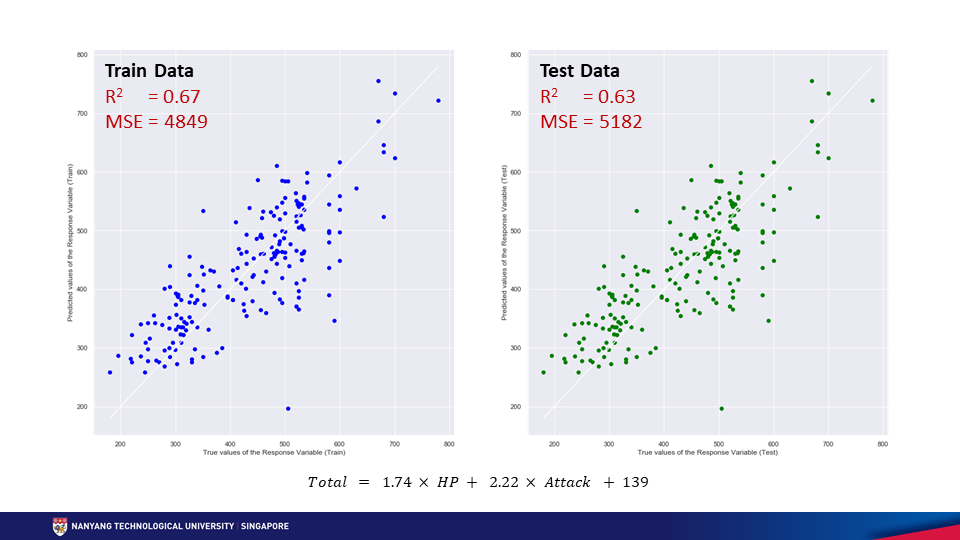

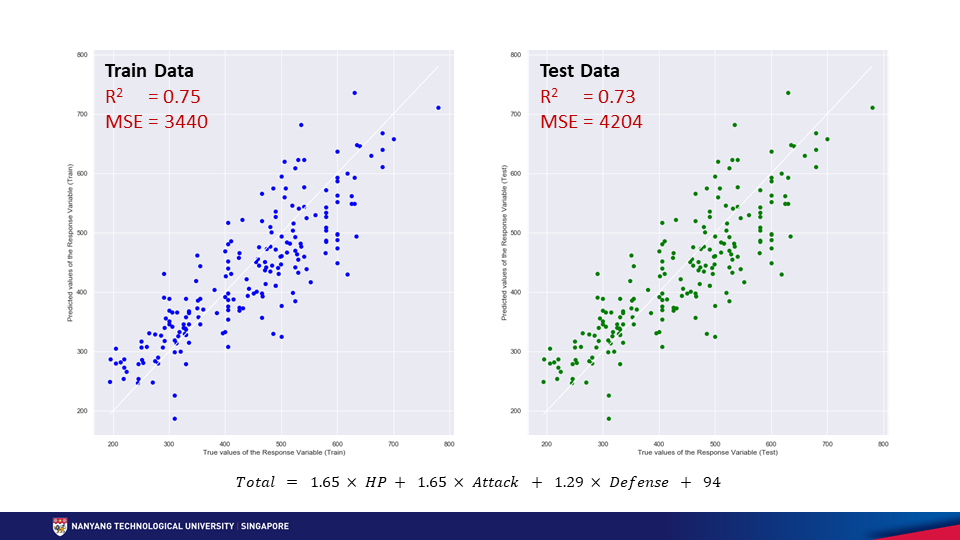

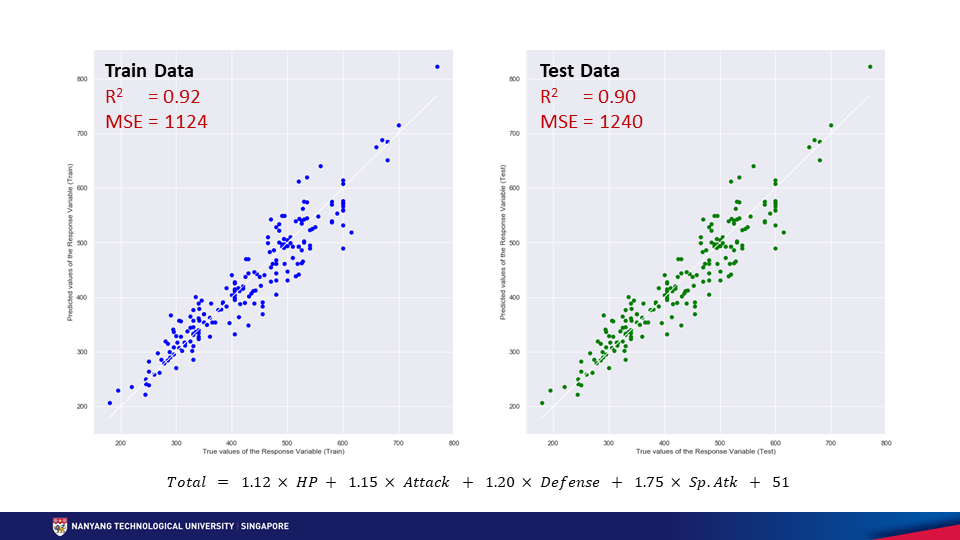

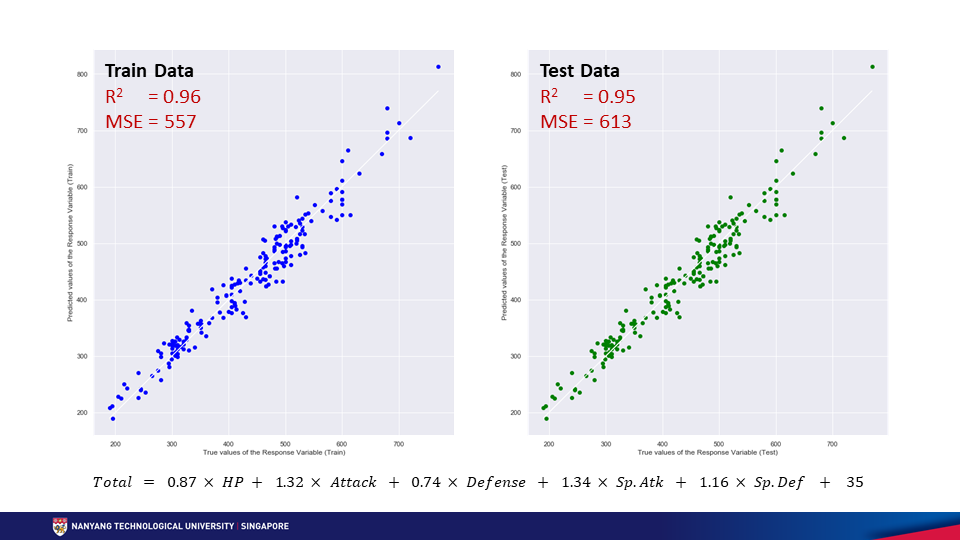

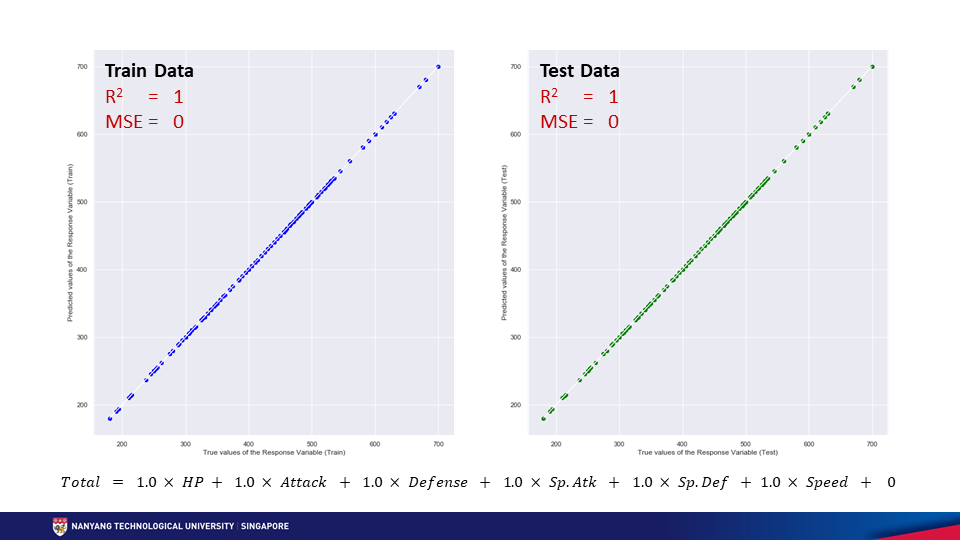